<a href="https://colab.research.google.com/github/navya04002/Navya-Agarwal/blob/main/Final_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Attack Risk Prediction🫀**

# **📝Business Problem Understanding**

"Cardiovascular diseases are a serious health threat which is often caused due to blockage in arteries or veins through which blood flows to heart. Identifying the high risk at early stage is very important for prevention."

This project aims to predict heart attack risk using several factors such as age, cholesterol, blood pressure, alcohol consumption etc. and develop a predictive model which can identify patients at high risk of heart disease.

**Importance:**

- It will allow Healthcare Management to make prevention strategies and ultimately providing it to the patients at higher risk.
- Predicting the risk will help healthcare management to even reduce cost when emergency treatments are done. (More likely to know about the number of cases which require urgent care).
- Improve patient care and outcomes.
- More effectively use of healthcare resources

# **Source of the Data:**
https://www.kaggle.com/datasets/alikalwar/heart-attack-risk-prediction-cleaned-dataset/data

It is a Binary classification Problem and my goal is to predict wheather a patient is at a risk of a heart attack.

**Features:**

Demographics: Age, Gender

Medical Conditions: Diabetes, Obesity, Blood Sugar

Lifestyle Factors: Smoking, Alcohol, Diet, Exercise

Clinical Test: Cholesterol, Blood Pressure, CK-MB, Troponin

Target Variable: Heart Attack Risk (Binary: 0 = Low, 1 = High)

# **🧾Importing Essential Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **📥Data Collection**

---

This gives a breif description of the columns and their values in the dataset.

In [ ]:
df_har = pd.read_csv("heart-attack-risk-prediction-dataset.csv")

df_har.head()

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Heart Attack Risk (Text),Gender,Systolic blood pressure,Diastolic blood pressure
0,0.595506,0.314286,0.047663,0.0,0.0,1.0,0.0,0.0,0.208326,0,...,0.0,0.333333,0.0,0.227018,0.048229,0.036512,0,Male,0.600000,0.534884
1,0.595506,0.096429,0.047663,1.0,1.0,1.0,1.0,1.0,0.752420,1,...,2.0,0.666667,0.0,0.227018,0.048229,0.036512,0,Male,0.574194,0.569767
2,0.595506,0.189286,0.047663,0.0,0.0,1.0,0.0,1.0,0.200998,2,...,4.0,1.000000,0.0,0.227018,0.048229,0.036512,0,Male,0.187097,0.674419
3,0.078652,0.960714,0.071494,1.0,1.0,1.0,1.0,1.0,0.090557,2,...,1.0,0.500000,0.0,0.227018,0.048229,0.036512,0,Male,0.645161,0.593023
4,0.078652,0.792857,0.071494,1.0,0.0,1.0,1.0,0.0,0.601030,2,...,1.0,0.166667,0.0,0.227018,0.048229,0.036512,0,Male,0.251613,0.383721


# **🪓Splitting the Data into Train & Test**

In [ ]:
df_har_train, df_har_test = sklearn.model_selection.train_test_split(df_har, test_size=0.2, random_state=42)

print("df_har size:", df_har.shape)
print("df_har_train:", df_har_train.shape)
print("df_har_test:", df_har_test.shape)

df_har size: (9651, 27)
df_har_train: (7720, 27)
df_har_test: (1931, 27)


source of the code: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

**Inferences:**

split the data into train and test to avoid overfitting.

- The test size = 0.2 i.e, 20% dataset will be used for testing and remaining 80% will be used for training.

# **🔍Data Exploration**

---
In data exploration we will see what unique features we have and if there is any null or missing values present in my dataset.

- It helps to find relationship between features, identify the patterns in the dataset & potential issues that might affect the model performance and accuracy.

In [ ]:
df_har_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7720 entries, 6915 to 7270
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              7720 non-null   float64
 1   Cholesterol                      7720 non-null   float64
 2   Heart rate                       7720 non-null   float64
 3   Diabetes                         7504 non-null   float64
 4   Family History                   7504 non-null   float64
 5   Smoking                          7504 non-null   float64
 6   Obesity                          7504 non-null   float64
 7   Alcohol Consumption              7504 non-null   float64
 8   Exercise Hours Per Week          7720 non-null   float64
 9   Diet                             7720 non-null   int64  
 10  Previous Heart Problems          7504 non-null   float64
 11  Medication Use                   7504 non-null   float64
 12  Stress Level          

In [ ]:
df_har_train.isnull().sum()

,0
Age,0
Cholesterol,0
Heart rate,0
Diabetes,216
Family History,216
Smoking,216
Obesity,216
Alcohol Consumption,216
Exercise Hours Per Week,0
Diet,0


In [ ]:
df_har_train.nunique()

,0
Age,77
Cholesterol,282
Heart rate,87
Diabetes,2
Family History,2
Smoking,2
Obesity,2
Alcohol Consumption,2
Exercise Hours Per Week,7077
Diet,4


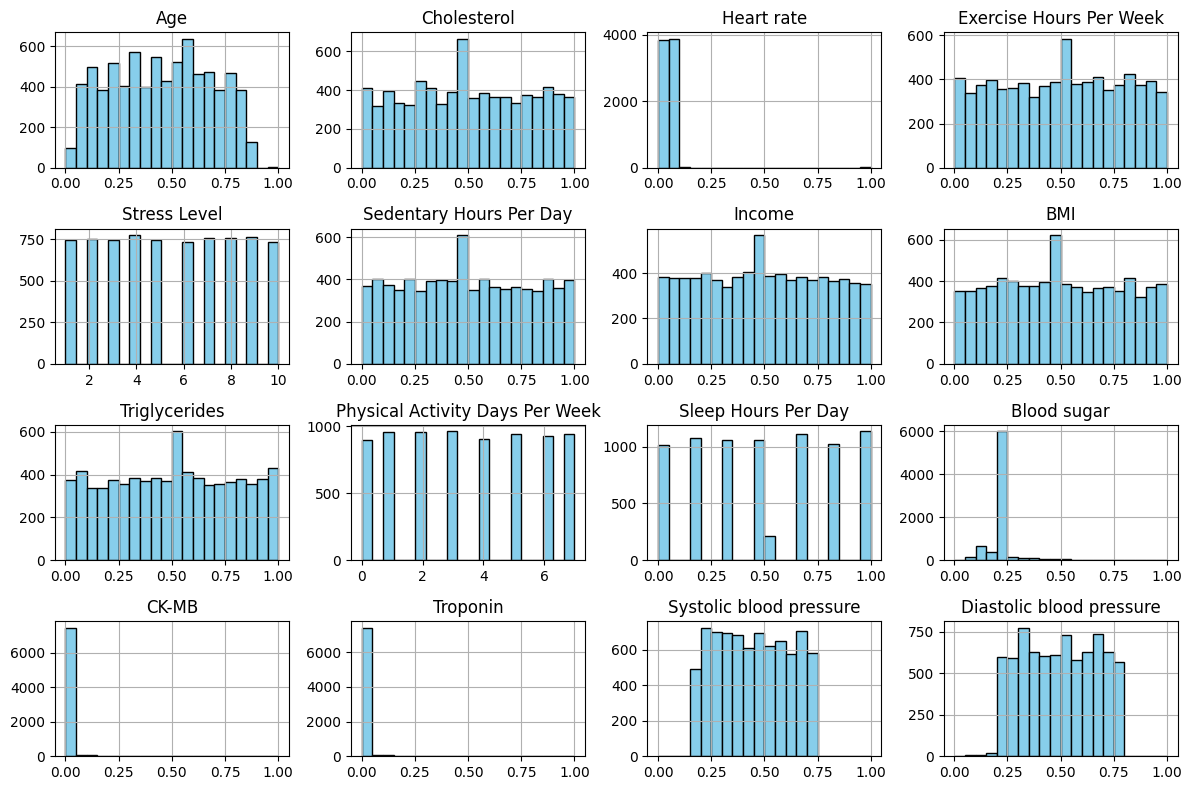

In [ ]:
columns = [col for col in df_har_train.columns if df_har_train[col].nunique() > 4]

df_har_train[columns].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

source of code: https://seaborn.pydata.org/generated/seaborn.histplot.html

<Axes: xlabel='Heart Attack Risk (Binary)'>

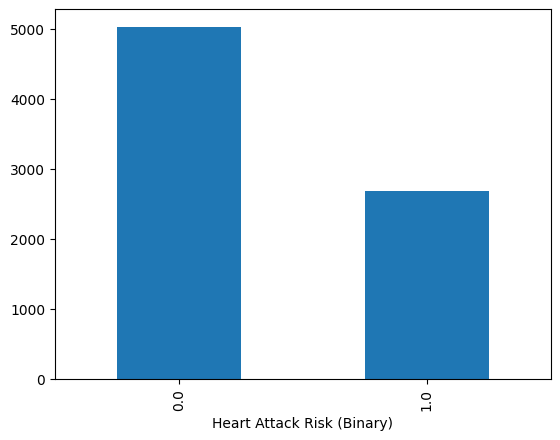

In [ ]:
figsize=(6, 4)
df_har_train['Heart Attack Risk (Binary)'].value_counts().plot(kind='bar')

source of the code: https://seaborn.pydata.org/generated/seaborn.barplot.html

**Inferences:**

**Heart Attack Risk (Binary)** shows that there are two values i.e -

0 : low risk of heart attack

1 : high risk of heart attack.

By this we can say that the data provided is little unbalanced as for proper evaluation we should work on a balanced dataset. This can create a biased data analysis.

<Axes: xlabel='Heart Attack Risk (Text)'>

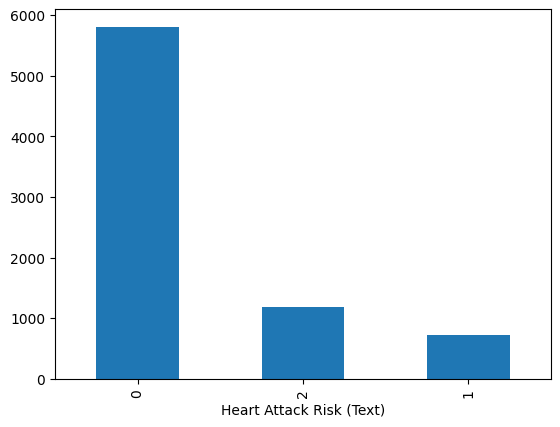

In [ ]:
figsize=(6, 4)
df_har_train['Heart Attack Risk (Text)'].value_counts().plot(kind='bar')

**Inferences:**

**Heart Attack Risk (Text) graph** shows that there are three different type of unique values.

0 : Low Risk of heart attack.

1 : Moderate Risk

2 : High Risk

Here also we can see that the data is highly imbalanced as class 0 has a very high count as compared to class 1 and class 2.

<Axes: xlabel='Gender'>

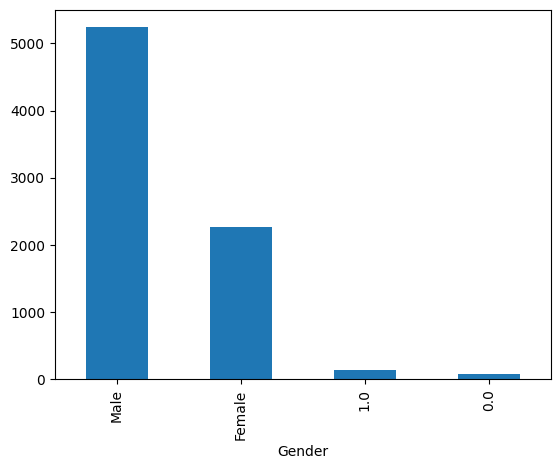

In [ ]:
df_har_train['Gender'].value_counts().plot(kind='bar')

**Inferences:**

**Gender** column has 4 unique values: ['Male' , 'Female, '1.0' , '0.0']
and the data type of the gender is object, that means even the values 0 and 1 is entered as string type.

# **⚙️Data Cleaning & Preprocessing**

---
There are some missing values in this dataset and some features are present which might not be suitable for machine learning algorithms.
For improving these things I am doing data cleaning and preprocessing.

In [ ]:
df_har_train['Gender'] = df_har_train['Gender'].str.strip()
df_har_train['Gender'] = df_har_train['Gender'].replace({'Female': 0, 'Male': 1, '1' : 1, '0' : 0})
df_har_train['Gender'] = pd.to_numeric(df_har_train['Gender'], errors='coerce')

df_har_test['Gender'] = df_har_test['Gender'].str.strip()
df_har_test['Gender'] = df_har_test['Gender'].replace({'Female': 0, 'Male': 1, '1' : 1, '0' : 0})
df_har_test['Gender'] = pd.to_numeric(df_har_test['Gender'], errors='coerce')

source of the code: https://www.w3schools.com/python/ref_string_strip.asp

https://www.w3schools.com/python/ref_string_replace.asp

https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

**Inferences:**

Assigning numerical values to objective values of Gender.

str.strip() for stripping out whitespaces.

In [ ]:
numerical_features = []
categorical_features = []

for column in df_har_train.columns:
  if df_har_train[column].nunique() > 4:
    numerical_features.append(column)
  else:
    categorical_features.append(column)

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['Age', 'Cholesterol', 'Heart rate', 'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Blood sugar', 'CK-MB', 'Troponin', 'Systolic blood pressure', 'Diastolic blood pressure']
Categorical features: ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Heart Attack Risk (Binary)', 'Heart Attack Risk (Text)', 'Gender']


source of the code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html

https://stackoverflow.com/questions/70764649/how-to-build-a-loop-for-converting-entires-of-categorical-columns-to-numerical-v

**Inferences:**

Identifying numerical and categorical features is important for further preprocessing steps, because numerical features require scaling and categorical features require encoding before model evaluation.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)

numerical_features = df_har_train.select_dtypes(include=np.number).columns
numerical_features = df_har_test.select_dtypes(include=np.number).columns

df_har_train[numerical_features] = imputer.fit_transform(df_har_train[numerical_features])
df_har_test[numerical_features] = imputer.transform(df_har_test[numerical_features])

source of code: https://scikit-learn.org/stable/modules/impute.html

**Inferences:**

Filling up the missing values using KNN Imputer which finds the nearest data points based on Euclidean distance(genrally) and then do the averaging of the nearest neigbours to fill the missing values.

Using KNN imputer for numerical features was good for the daataset because some of the features are inter-dependent on each other like blood pressure and heart rate aND preserves the relation and distribution between data.

In [ ]:
categorical_imputer = SimpleImputer(strategy='most_frequent')

df_har_train[categorical_features] = categorical_imputer.fit_transform(df_har_train[categorical_features])
df_har_test[categorical_features] = categorical_imputer.transform(df_har_test[categorical_features])

source of code: https://scikit-learn.org/stable/modules/impute.html

**Inferences:**

Using Simple Imputer (Most frequent) for Categorical features is important bacause categorical features have ordinal distribution of data with values such as 0,1,2 and so on. Simple Imputer will look to the most frequent values in the particular columns and fill the missing values with mode.

In [ ]:
print("Checking for null values after for imputation for training data:",end="\n")
print(df_har_train.isnull().sum())

Checking for null values after for imputation for training data:
Age                                0
Cholesterol                        0
Heart rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk (Binary)         0
Blood sugar                        0
CK-MB                              0
Troponin                           0
Heart Attack Risk (Text)           0
Gender                             0
Systolic b

**Inferences:**

Re-checking for missing values. No missing values found after imputation.

In [ ]:
#Finding number of outliers for training set:
numerical_columns = df_har_train.nunique()[df_har_train.nunique() > 4].index

first_quartlie_Q1 = df_har_train[numerical_columns].quantile(0.25)
third_quartile_Q3 = df_har_train[numerical_columns].quantile(0.75)
inter_quartile_range_IQR = third_quartile_Q3 - first_quartlie_Q1

outliers = ((df_har_train[numerical_columns] < (first_quartlie_Q1 - 1.5 * inter_quartile_range_IQR )) |
            (df_har_train[numerical_columns] > (third_quartile_Q3 + 1.5 * inter_quartile_range_IQR )))

print(outliers.sum())

#Finding outliers for testing set:
numerical_columns = df_har_test.nunique()[df_har_test.nunique() > 4].index

first_quartlie_Q1 = df_har_test[numerical_columns].quantile(0.25)
third_quartile_Q3 = df_har_test[numerical_columns].quantile(0.75)
inter_quartile_range_IQR = third_quartile_Q3 - first_quartlie_Q1

outliers = ((df_har_test[numerical_columns] < (first_quartlie_Q1 - 1.5 * inter_quartile_range_IQR )) |
            (df_har_test[numerical_columns] > (third_quartile_Q3 + 1.5 * inter_quartile_range_IQR )))

Age                                   0
Cholesterol                           0
Heart rate                            2
Diabetes                              0
Family History                        0
Smoking                             763
Obesity                               0
Alcohol Consumption                   0
Exercise Hours Per Week               0
Previous Heart Problems               0
Medication Use                        0
Stress Level                          0
Sedentary Hours Per Day               0
Income                                0
BMI                                   0
Triglycerides                         0
Physical Activity Days Per Week       0
Sleep Hours Per Day                   0
Blood sugar                        1912
CK-MB                              1912
Troponin                           1912
Systolic blood pressure               0
Diastolic blood pressure              0
dtype: int64


source of code: https://stackoverflow.com/questions/74236711/pandas-outliers-with-and-without-calculations

**Inferences**

Checking for the presence of outliers. They play a major role in skewing the statistics of the dataset which can apparently leads to inaccurate results and analysis.

As the data is highly skwed, I chose to find outliers with the help of Inter-Quartile Range(IQR) method.

Q1: First Quartile(Q1) denotes the value below which 25% of the data points lie.
Q3: Third Quartile(Q3) denotes the value below whcih 75% of the data points are present.

IQR: is the difference between the third and first quartile.

Datapoints falling below (Q1 - 1.5) X IQR and above (Q3 - 1.5) x IQR are the potential outliers in the dataset.

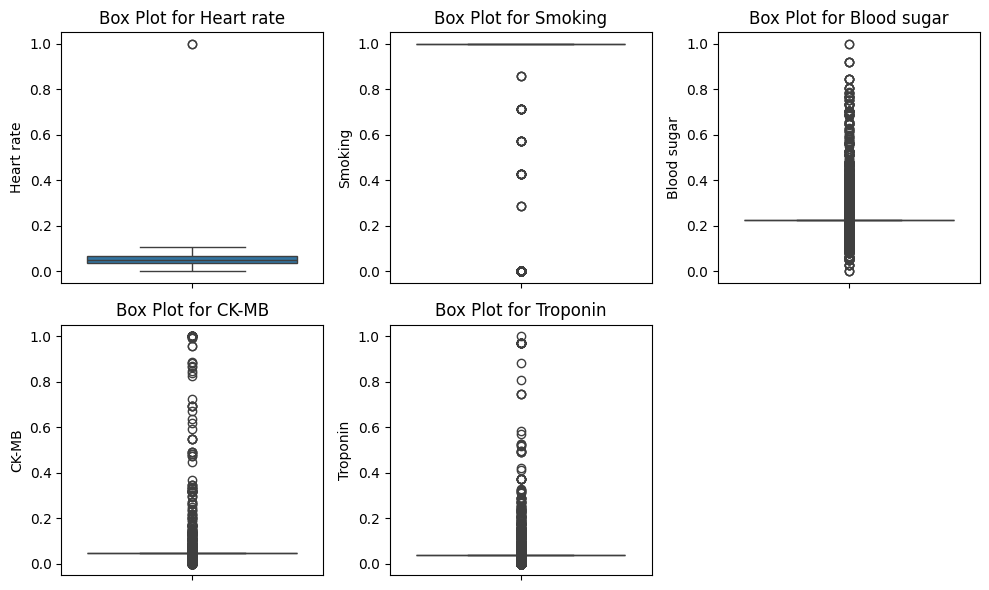

In [ ]:
outliers_columns = ['Heart rate', 'Smoking', 'Blood sugar', 'CK-MB', 'Troponin']

plt.figure(figsize=(10, 6))
for i, column in enumerate(outliers_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df_har_train[column])
    plt.title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()

source of code: https://seaborn.pydata.org/generated/seaborn.boxplot.html

**Inferences:**

I have plotted graphs for the columns which has presence of outliers.

Outliers can represent that the patient have serious health issues.

Patients who can have varied blood sugar level and have high chances of diabetes.

Similarly for Troponin and CK-MB, high level can suggest serious health issues to patients or high risk of heart attack.

NOTE: There are high possibilities that some of the data variables have data entry errors thus leading to presence of outliers, so before making any final decision, I will either have to verify the data accuracy or I will just reduce the impact of outlier to prevent the data from being biased.


In [ ]:
log_transform_columns = [ 'Blood sugar', 'CK-MB', 'Troponin']
for col in log_transform_columns:
  df_har_train[col] = np.log(df_har_train[col]+1)
  df_har_test[col] = np.log(df_har_test[col]+1)


source of code: https://www.geeksforgeeks.org/log-and-natural-logarithmic-value-of-a-column-in-pandas-python/

**Inferences:**

Log Transformation:
In medical cases, sometime its essential to keep outliers as a part of the analysis as it can indicate people with seviour health issues and who need genuine care and diagnosis. Thus in this case where it is impossible to verify the data from the domain experts, I will not remove all the outliers but I will just reduce the impact of extream outliers which might be a case of mis-leading data or data entry errors.

We have extreme outliers in Blood sugar, CK-MB and Troponin. so we will apply **Log Transformation** to only those those columns as these columns are highly skwed and there are many outliers present outside the IQR.

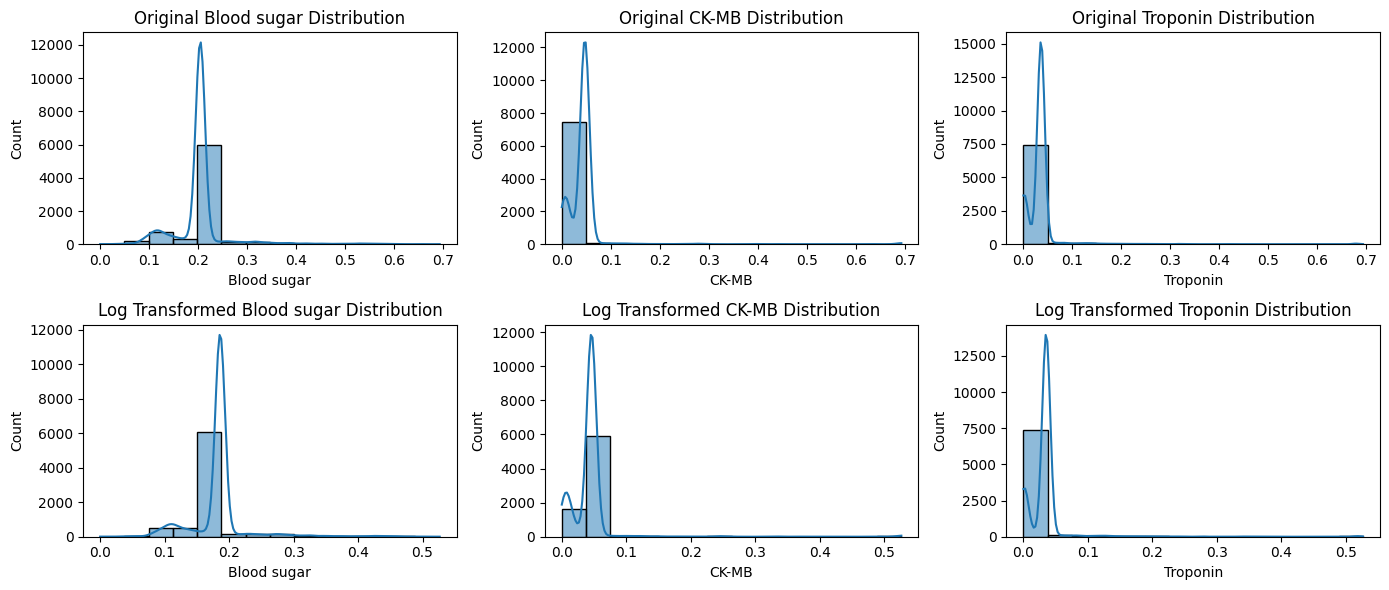

In [ ]:
columns =  ['Blood sugar', 'CK-MB', 'Troponin']

fig, axes = plt.subplots(2, len(columns), figsize=(14, 6))

for i, column in enumerate(columns):
    sns.histplot(df_har_train[column], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f"Original {column} Distribution")

for i, column in enumerate(columns):
    df_har_train[column] = df_har_train[column].apply(lambda x: np.log(x + 1))
    sns.histplot(df_har_train[column], kde=True, ax=axes[1, i])
    axes[1, i].set_title(f"Log Transformed {column} Distribution")

plt.tight_layout()
plt.show()

source of code: https://www.geeksforgeeks.org/log-and-natural-logarithmic-value-of-a-column-in-pandas-python/

https://seaborn.pydata.org/generated/seaborn.histplot.html

**Inferences:**

In the first row, original distribution of the particular features show the untransformed data. The peaks and the tails going towards the right side of the graph indicated the presence of outliers. We can see that the tails are going towards value 0.7.

The graphs in the 2nd row are the plots after the log transfomation were the tail has slighlty shift towards left side (0.5) and data was slighlt got distributed evenly, indicating that extreem outliers were being removed properly, thus making the data more symmetrical and reducing the impact of outliers.

# **🧮Feature and Target Selection**

In [ ]:
x_train = df_har_train.drop(['Heart Attack Risk (Binary)', 'Heart Attack Risk (Text)'], axis=1)
y_train = df_har_train['Heart Attack Risk (Binary)']

x_test = df_har_test.drop(['Heart Attack Risk (Binary)', 'Heart Attack Risk (Text)'], axis=1)
y_test = df_har_test['Heart Attack Risk (Binary)']

In [ ]:
print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)
print("shape of x_test:", x_test.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (7720, 25)
shape of y_train: (7720,)
shape of x_test: (1931, 25)
shape of y_test: (1931,)


**Inferences:**

Dropping Heart attack risk(Text) from the training and testing data before model tarining beacuse it contained the information of target variable in different form. This is done to avoid data leakage, as the model will have access to the answers and thus will result in overfitting.

# **Feature Scaling:**

As I finalised working with the Random Forest classifier, this model does not need the features to be scaled. It splits data on the basis of features threshold. Standard scaler is important for models based on distance(KNN, SVM) OR gradient decent models (Logistic and Linear regression) as these models are scale sensitive.

And as the categorical features in the dataset were ordinal [ i.e 0,1,2...] thus they were already in the numeric form. So they did not require onehot encoding and column transformation.

# **💡Model Prediction**

# **Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Tuning and Evaluating for RandomForestClassifier(random_state=42)...
Best Parameters for rf: RandomForestClassifier(n_estimators=300, random_state=42) 

Accuracy: 0.6835836354220611 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.99      0.81      1287
         1.0       0.80      0.07      0.13       644

    accuracy                           0.68      1931
   macro avg       0.74      0.53      0.47      1931
weighted avg       0.72      0.68      0.58      1931



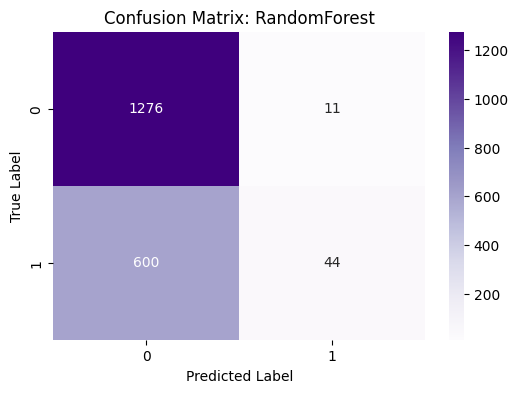

In [ ]:
param_grids = {'n_estimators': [100, 200, 300], 'max_depth': [10,20,30, None],'min_samples_split': [2, 5, 10]}

print(f"Tuning and Evaluating for {rf}...")

grid_search = GridSearchCV(estimator=rf, param_grid = param_grids, cv=5,)

grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best Parameters for rf: {best_rf} \n")

y_pred = best_rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy} \n")
print(f"Classification Report:\n{class_report}")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title(f"Confusion Matrix: RandomForest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **Feature Importance for Random Forest**

In [ ]:
feature_importance = rf.feature_importances_

feature_df_har = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importance
})

features = feature_df_har.sort_values(by='Importance', ascending=False)
print(features)

                            Feature  Importance
15                              BMI    0.079763
8           Exercise Hours Per Week    0.079145
13          Sedentary Hours Per Day    0.078071
14                           Income    0.075801
16                    Triglycerides    0.075006
1                       Cholesterol    0.073365
23          Systolic blood pressure    0.067832
0                               Age    0.067378
2                        Heart rate    0.066542
24         Diastolic blood pressure    0.063423
12                     Stress Level    0.042223
17  Physical Activity Days Per Week    0.039014
18              Sleep Hours Per Day    0.033937
9                              Diet    0.028139
19                      Blood sugar    0.017011
21                         Troponin    0.016291
20                            CK-MB    0.016254
7               Alcohol Consumption    0.011274
11                   Medication Use    0.011263
4                    Family History    0

source of code: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

**Inferences:**

The list shows the features from high priority to low priority. BMI has the highest importance in predicting the target variable. Lifestyle factors such as excersice hours, sedentary hours and income are also major factors in contibuting in higher risk for heart attack.

Thus, checking for the feature will allow the healthcare sector to analyse what all features interact with each other and increases the risk of heart attack.

## **Model Selection Explanation:**

I experimented with different machine learning algorithms such as:
- Logistic Regression
- Random Forest
- XGBoost (Extreem Gradient Boosting)
- Gradient Boosting

For each of the above model I performed hyperparameter tuning using Grid-search for optimizing the model performance.
Also analysed metrics such as ROC-AUC and Accuracy, Recall, Precision & F1-score. Among all the models evaluation techniques, **Random Forest was the best model in performance after Hyperparameter Tuning using GridSearch CV.**

As the dataset is highly unbalanced, I tried balancing techniques such as **SMOTE** and **SMOTETomek** to reduce the impact of biasness of the dataset.
Despite using these techniques the overall result remain the same as before.


## **Data Imbalance:**

The data given was highly imbalanced thus lead to low accuracy result that did not allow model to show it's real performance. In such senarious, **accuracy can be a missleading metric** to analyse the model performance as a model may predict the majority class perfectly but fails to perform good with minority class. Thus accuracy is not a reliable metric for this type of dataset.



## **Final Report:**

Focused on **classification report** for my final analysis provided me a better model performance ideas. The following metrix were taken into account to provide analysis report:

            **Class   Precision    Recall   F1-score**  
                0.0       0.68      0.99      0.81      
                1.0       0.80      0.07      0.13       

Majority class i.e **"class 0"**  has **high precision and recall value**. Thus the class was identified perfectly.

Minority class i.e **"Class 1"** has **very low recall value**, thus shows that model fails to identify true cases that is cases those have high chances of Heart Attack.

**F1-score is very low for class 1**, means the model is right when it says that something is class 1 but eventually fails to identify the actual cases.

Thus, it is highly suggested that the dataset should contain some more cases for positive values for heart attacks to balance the dataset and get a comparatively better final analysis.

## **Interpretation of Confussion Matrix:**

- True Positives (TP): 1276 values were correctly predicted as class 0, when they were actually class 0.
- True Negatives (TN): 44 values were corectly predicted as class 1, when they were actually class 1
- False Positives (FP): 11 values were incorrectly predicted as class 0 when they were actaully class 1.
- False Negatives (FN): 600 values were incorectly predicted as class 1 when they were actually class 0.

This shows that model is very good at predicting class 0 (majority class) but is struggling to predict class 1 (minority class).

**Strenghts of the solution:**
- Random Forest outperformed from every other models after hyperparameter tuning.
- It was best in dealing with the non-linear relationship between the features.

**Limitations:**

- The model still skips some of the high risk-patients (i.e false positive)
- The current dataset does not represent all demograph groups equally
- some features may have measurement errors or data entry errors.



**Business Implications:**

- Take help of medical experties to guide with the extreme cases of outliers.
- Search for more factors which can cause heart attack.
- Be specific with the features to clearly describe the fearures instead of just putting ordinal values

**Data-Driven Recommendations:**

- Collect more data with high risk of heart disease making the dataset balanced which eventually help in a better model performance.

- Create derived features, such as BMI Categories, cholesterol levels and stress level over time.

- Maintain a pattern in the features instead assigning a randome value (for eg. the gender column had 4 unique categories)

**Model Explanability:**

As a Data Scientist it is important for me take make accurate predictions and explain the "why" behind every question. It is important for my client to understand that how the model works and what are the strengths and weakness of the model. Biases in this model was the important criteria which I have mentioned so that daat correction can be done if there is any data entry errors or if there is any genuine critical case which need to be seen on urgent basis.

Features those are highly responsible for heart attack (mentioned above in Feature Importances section) provides a good guide to the healthcare segment about the heart risk factors and thus form a cure for it.
  


*Submitted By: Navya Agarwal*

*Student Number: GH1035199*